# Half Adder
Below, we add q1 + q0 and measure the result into classical bits c2c1.

The other qubits, q2 and q3 are only there to help.

https://medium.com/@harini.hapuarachchi/a-beginners-guide-to-qiskit-1-0-c8e3e854d732

In [5]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

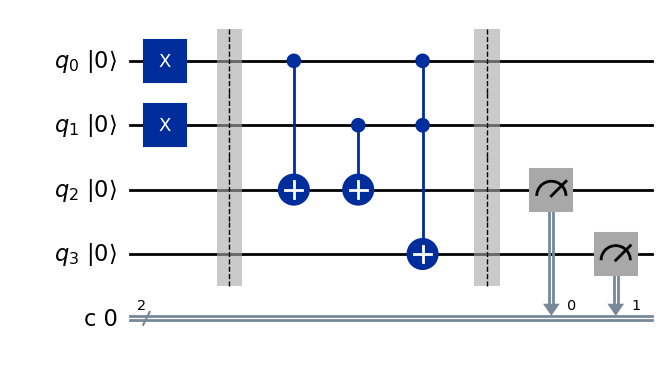

In [6]:
# Make a circuit with 4 qubits and 2 classical bits
qc_ha = QuantumCircuit(4,2)  

# encode inputs to perform q_1 + q_0 = 1 + 1 
qc_ha.x(0)          
qc_ha.x(1)          

qc_ha.barrier()   

# Code the algorithm 
qc_ha.cx(0,2)       # CNOT with q0 as control and q2 as target
qc_ha.cx(1,2)       # CNOT with q1 as control and q2 as target
qc_ha.ccx(0,1,3)    # CCNOT with q0, q1 as controls and q3 as target

qc_ha.barrier()

# extract outputs 
qc_ha.measure(2,0)  # Measure qubit 2 into classical bit 0
qc_ha.measure(3,1)  # Measure qubit 3 into classical bit 1

# initial_state=True displays (doesn't set) the left-most values of qubits
qc_ha.draw(output = 'mpl', initial_state=True)   

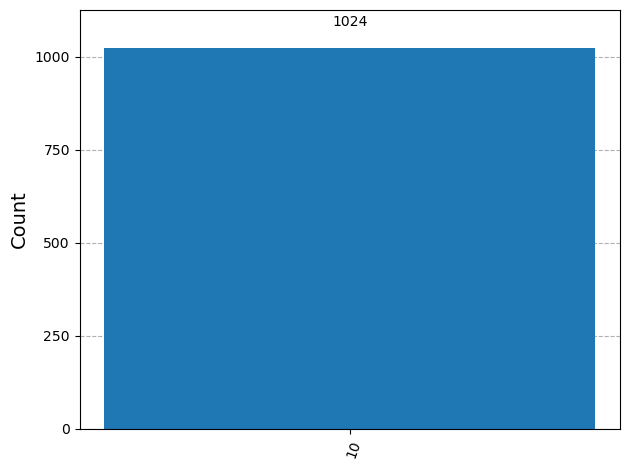

In [7]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

backend = BasicSimulator()

backend = BasicSimulator()
result = backend.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)

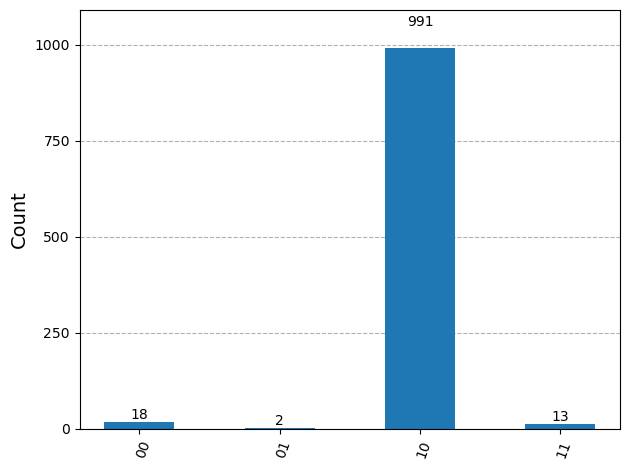

In [8]:
from qiskit.providers.fake_provider import GenericBackendV2
 
# Generate a 4-qubit simulated fake backend
# Several legacy fake backends are replaced with GenericBackendV2 in 1.0
backend = GenericBackendV2(num_qubits=4)  

# Transpile and run
transpiled_circuit = transpile(qc_ha, backend)
result = backend.run(transpiled_circuit).result()

counts = result.get_counts()
plot_histogram(counts)